# 4.9 IC customers data check and merge

# Part 1
## 1. Import libraries and data
## 2. Gather basic data on customers
## 3. Make proposed adjustments to data
## 4. Prepare to Merge Data Sets
## 5. Merge Data Sets & Check
## 6. Export File

### 1. Import libraries and data

In [1]:
# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
# Create Path

In [4]:
path = r'/Users/bethanybreed/Documents/A Career Foundry/07-2022 Instacart Basket Analysis'

In [5]:
# Import customer.csv

In [6]:
customer = pd.read_csv (os.path.join(path, '02 Data', 'original data', 'customers.csv'), index_col = False)

In [7]:
### 2. Gather basic data on customers

In [8]:
# head() shows column headings, also glancing for any NaN entries

In [9]:
customer.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [10]:
# info gives num of rows and data type for each column to see if any types need changed

In [11]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   First Name    194950 non-null  object
 2   Surnam        206209 non-null  object
 3   Gender        206209 non-null  object
 4   STATE         206209 non-null  object
 5   Age           206209 non-null  int64 
 6   date_joined   206209 non-null  object
 7   n_dependants  206209 non-null  int64 
 8   fam_status    206209 non-null  object
 9   income        206209 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 15.7+ MB


In [12]:
# describe helps us to see if anything is off like odd ages that are inappropriate

In [13]:
customer.describe()

,user_id,Age,n_dependants,income
count,206209.000000,206209.000000,206209.000000,206209.000000
mean,103105.000000,49.501646,1.499823,94632.852548
std,59527.555167,18.480962,1.118433,42473.786988
min,1.000000,18.000000,0.000000,25903.000000
25%,51553.000000,33.000000,0.000000,59874.000000
50%,103105.000000,49.000000,1.000000,93547.000000
75%,154657.000000,66.000000,3.000000,124244.000000
max,206209.000000,81.000000,3.000000,593901.000000


In [14]:
### Based off these observations
### There are no NaN values (missing data) to be corrected
### user_id could be switched to object
### a few title names could be adjusted to be more clear or correct spelling (surname, State, n_dependants)
### I believe all columns are relevant so I will not drop any columns
### I do want to double check on max income just to see if there are a lot of high incomes or just one outlier

### 3. Make proposed adjustments to data

In [15]:
#Rename columns to adjust spelling, make more intuitive and add lower case and underscore to match other data style

In [16]:
customer.rename(columns = {'Surnam' : 'last_name'}, inplace = True)

In [17]:
customer.rename(columns = {'STATE' : 'state'}, inplace = True)

In [18]:
customer.rename(columns = {'n_dependants' : 'num_of_dependants'}, inplace = True)

In [19]:
customer.rename(columns = {'First Name' : 'first_name'}, inplace = True)

In [20]:
customer.rename(columns = {'Age' : 'age'}, inplace = True)

In [21]:
customer.rename(columns = {'Gender' : 'gender'}, inplace = True)

In [22]:
# Check Column Headings

In [23]:
customer.head()

,user_id,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [24]:
# I checked my other ords_prods_merge data and my user_id is an int 64 so I want to keep that the same to merge data

In [25]:
#Looking for an outlier in income

In [26]:
#Import graphing libraries

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

<AxesSubplot:ylabel='Frequency'>

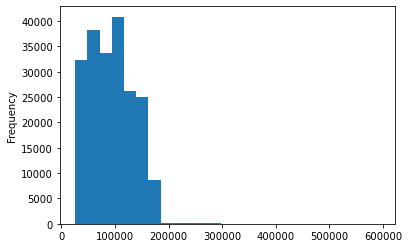

In [28]:
customer['income'].plot.hist(bins = 25)

In [29]:
#Check scatterplot as well

<AxesSubplot:xlabel='income', ylabel='income'>

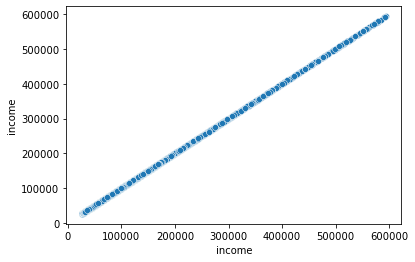

In [30]:
sns.scatterplot(x = 'income', y = 'income',data = customer)

In [31]:
#Histogram does show that income is heavily weighted below 200,000 which would be expected.
#Scatterplot does show that there isn't just one or two variables above that, but many, so they can stay

### I also need to search for duplicates

In [32]:
#Double check for any missing values

In [33]:
customer.isnull().sum()

user_id                  0
first_name           11259
last_name                0
gender                   0
state                    0
age                      0
date_joined              0
num_of_dependants        0
fam_status               0
income                   0
dtype: int64

In [34]:
#Figure out what missing values are

In [35]:
df_nan=customer[customer['first_name'].isnull() == True]

In [36]:
df_nan

,user_id,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income
53,76659,NaN,Gilbert,Male,Colorado,26,1/1/2017,2,married,41709
73,13738,NaN,Frost,Female,Louisiana,39,1/1/2017,0,single,82518
82,89996,NaN,Dawson,Female,Oregon,52,1/1/2017,3,married,117099
99,96166,NaN,Oconnor,Male,Oklahoma,51,1/1/2017,1,married,155673
105,29778,NaN,Dawson,Female,Utah,63,1/1/2017,3,married,151819
...,...,...,...,...,...,...,...,...,...,...
206038,121317,NaN,Melton,Male,Pennsylvania,28,3/31/2020,3,married,87783
206044,200799,NaN,Copeland,Female,Hawaii,52,4/1/2020,2,married,108488
206090,167394,NaN,Frost,Female,Hawaii,61,4/1/2020,1,married,45275
206162,187532,NaN,Floyd,Female,California,39,4/1/2020,0,single,56325


In [37]:
# as values are first name, but no other column has missing values I am choosing to keep these
# when doing evaluations we will be comparing income or ages or locations, we won't be using private information
# such as first name to be shown in data.  If values were missing in other categories as well I would delete them.

In [38]:
# Search for Duplicates

In [39]:
df_dups = customer[customer.duplicated()]

In [40]:
df_dups

,user_id,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income


In [41]:
# This shows no duplicates that need to be deleted from the data set

In [42]:
#Checking for any mixed data types that may need to be fixed

In [43]:
for col in customer.columns.tolist():
  weird = (customer[[col]].applymap(type) != customer[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (customer[weird]) > 0:
    print (col)

first_name


In [44]:
# first_name has mixed data types, which isn't unexpected as there are a lot of NaN. 
# As I pointed out earlier I am still keeping this colum so I will convert it all to string to avoid issues going forward

In [45]:
customer['first_name'] = customer['first_name'].astype('str')

### 4. Prepare to Merge Data Sets

In [46]:
# Import most current pickle file or ords/prods

In [47]:
op_merge = pd.read_pickle(os.path.join(path, '02 Data', 'prepared data', 'orders_products_merged48b.pkl'))

In [48]:
# Check Dimensions of dataframes

In [49]:
op_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,_merge,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,order_frequency,order_frequency_flag
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,both,Regularly busy,Busiest days,Average Orders,10,New customer,6.367797,Low Spender,20.0,Regular Customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,both,Regularly busy,Slowest days,Average Orders,10,New customer,6.367797,Low Spender,20.0,Regular Customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,both,Regularly busy,Slowest days,Most Orders,10,New customer,6.367797,Low Spender,20.0,Regular Customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,both,Least busy,Slowest days,Average Orders,10,New customer,6.367797,Low Spender,20.0,Regular Customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,both,Least busy,Slowest days,Most Orders,10,New customer,6.367797,Low Spender,20.0,Regular Customer


In [50]:
customer.head()

,user_id,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [51]:
op_merge.shape

(32404859, 23)

In [52]:
customer.shape

(206209, 10)

In [53]:
# user_id is the matching key in data sets, customer has less because each customer would only be listed once as in the large data they will be listed multiple times if they made multiple orders

In [54]:
op_merge.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
_merge                    category
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
mean_price                 float64
spending_flag               object
order_frequency            float64
order_frequency_flag        object
dtype: object

In [55]:
customer.dtypes

user_id               int64
first_name           object
last_name            object
gender               object
state                object
age                   int64
date_joined          object
num_of_dependants     int64
fam_status           object
income                int64
dtype: object

In [56]:
# having trouble merging so double checking user_id is int64 for both

In [57]:
#Run merge without indicator=True

In [58]:
ords_prods_all = op_merge.merge(customer, on = 'user_id')

In [59]:
# check for full match

In [60]:
ords_prods_all['_merge'].value_counts()

both          32404859
left_only            0
right_only           0
Name: _merge, dtype: int64

In [61]:
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependants,fam_status,income
0,2539329,1,1,2,8,7.0,196,1,0,Soda,...,Regular Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Regular Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Regular Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Regular Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Regular Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


### 6. Export File

In [62]:
ords_prods_all.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))